# 1.Implement as transfer learning on the chosen dataset using Xception architecture

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [21]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [22]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [23]:
# Convert labels to one-hot encoded
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [25]:
# Resize images to (71, 71, 3) for ResNet50 input
def resize_image(img):
    img = array_to_img(img)
    img = img.resize((71, 71))
    return img_to_array(img)


In [26]:
train_images = np.array([resize_image(img) for img in train_images])
test_images = np.array([resize_image(img) for img in test_images])


In [29]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(71, 71, 3))


94765736/94765736 [==============================] - 1s 0us/step


In [30]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [31]:
# Add custom layers for the CIFAR-10 task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [32]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 1198s 952ms/step - loss: 0.9240 - accuracy: 0.6783 - val_loss: 0.8135 - val_accuracy: 0.7171
Epoch 2/10
1250/1250 [==============================] - 1176s 941ms/step - loss: 0.6927 - accuracy: 0.7559 - val_loss: 0.7691 - val_accuracy: 0.7278
Epoch 3/10
1250/1250 [==============================] - 1171s 937ms/step - loss: 0.6044 - accuracy: 0.7858 - val_loss: 0.7459 - val_accuracy: 0.7402
Epoch 4/10
1250/1250 [==============================] - 1174s 939ms/step - loss: 0.5272 - accuracy: 0.8130 - val_loss: 0.7975 - val_accuracy: 0.7343
Epoch 5/10
1250/1250 [==============================] - 1174s 939ms/step - loss: 0.4651 - accuracy: 0.8350 - val_loss: 0.7953 - val_accuracy: 0.7384
Epoch 6/10
1250/1250 [==============================] - 1177s 942ms/step - loss: 0.4017 - accuracy: 0.8572 - val_loss: 0.8598 - val_accuracy: 0.7346
Epoch 7/10
1250/1250 [==============================] - 1189s 951ms/step - loss: 0.3495 - accuracy: 0.8766

In [34]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 233s 745ms/step - loss: 1.0812 - accuracy: 0.7336
Test accuracy: 73.36%


# 2.On the chosen dataset , using RNN for image classification

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [36]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [37]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [38]:
# Convert labels to one-hot encoded
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [39]:
# Flatten images into sequences
train_sequences = train_images.reshape(-1, 32, 32 * 3)
test_sequences = test_images.reshape(-1, 32, 32 * 3)


In [40]:
# Build RNN model
model = Sequential([
    LSTM(128, input_shape=(32, 32 * 3), return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [41]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 152s 117ms/step - loss: 1.8447 - accuracy: 0.3227 - val_loss: 1.6518 - val_accuracy: 0.3997
Epoch 2/10
1250/1250 [==============================] - 147s 118ms/step - loss: 1.6158 - accuracy: 0.4117 - val_loss: 1.4793 - val_accuracy: 0.4643
Epoch 3/10
1250/1250 [==============================] - 159s 127ms/step - loss: 1.4973 - accuracy: 0.4584 - val_loss: 1.4184 - val_accuracy: 0.4824
Epoch 4/10
1250/1250 [==============================] - 158s 126ms/step - loss: 1.4198 - accuracy: 0.4904 - val_loss: 1.3688 - val_accuracy: 0.5058
Epoch 5/10
1250/1250 [==============================] - 158s 126ms/step - loss: 1.3612 - accuracy: 0.5105 - val_loss: 1.3093 - val_accuracy: 0.5306
Epoch 6/10
1250/1250 [==============================] - 154s 123ms/step - loss: 1.3000 - accuracy: 0.5331 - val_loss: 1.3115 - val_accuracy: 0.5264
Epoch 7/10
1250/1250 [==============================] - 145s 116ms/step - loss: 1.2553 - accuracy: 0.5521 - val_

In [42]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(test_sequences, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 [==============================] - 13s 43ms/step - loss: 1.1892 - accuracy: 0.5732
Test accuracy: 57.32%


# 3.On a chosen timeseries dataset, forecast the trend using LSTM and GRU. Compare the performance of these two models


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
plt.style.use('fivethirtyeight')

In [ ]:
# Load the dataset
# First, we get the data
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

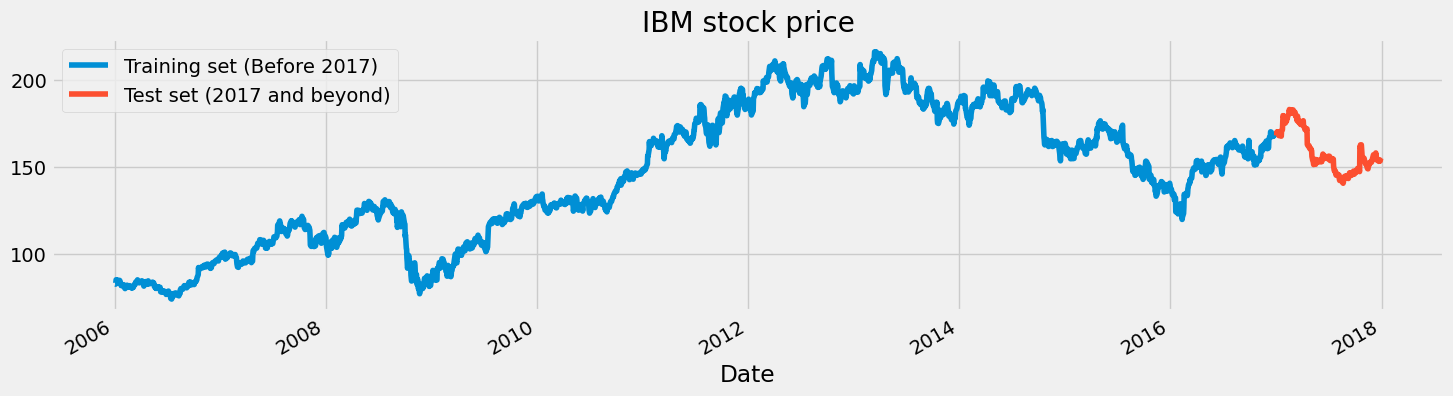

In [ ]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 19s 130ms/step - loss: 0.0201
Epoch 2/50
85/85 [==============================] - 9s 106ms/step - loss: 0.0094
Epoch 3/50
85/85 [==============================] - 11s 132ms/step - loss: 0.0082
Epoch 4/50
85/85 [==============================] - 11s 125ms/step - loss: 0.0074
Epoch 5/50
85/85 [==============================] - 10s 114ms/step - loss: 0.0057
Epoch 6/50
85/85 [==============================] - 11s 135ms/step - loss: 0.0056
Epoch 7/50
85/85 [==============================] - 10s 121ms/step - loss: 0.0051
Epoch 8/50
85/85 [==============================] - 10s 119ms/step - loss: 0.0047
Epoch 9/50
85/85 [==============================] - 12s 137ms/step - loss: 0.0048
Epoch 10/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0040
Epoch 11/50
85/85 [==============================] - 10s 120ms/step - loss: 0.0040
Epoch 12/50
85/85 [==============================] - 12s 136ms/step - loss: 0.0039
Epoch 13/50
85

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 [==============================] - 4s 44ms/step


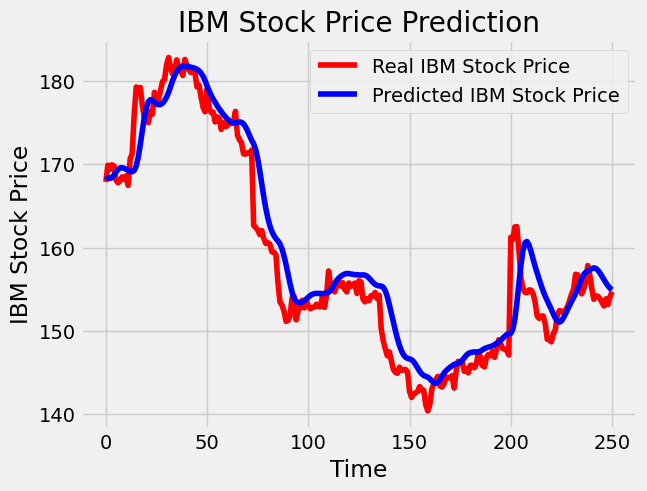

In [ ]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [ ]:
# Evaluating our model
LSTM=return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.257789512379162.


In [ ]:
# Make predictions using GRU model
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(tf.keras.optimizers.legacy.SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


19/19 [==============================] - 12s 211ms/step - loss: 0.1240
Epoch 2/50
19/19 [==============================] - 5s 272ms/step - loss: 0.0361
Epoch 3/50
19/19 [==============================] - 5s 273ms/step - loss: 0.0105
Epoch 4/50
19/19 [==============================] - 4s 216ms/step - loss: 0.0053
Epoch 5/50
19/19 [==============================] - 4s 220ms/step - loss: 0.0043
Epoch 6/50
19/19 [==============================] - 6s 335ms/step - loss: 0.0040
Epoch 7/50
19/19 [==============================] - 4s 215ms/step - loss: 0.0038
Epoch 8/50
19/19 [==============================] - 4s 212ms/step - loss: 0.0036
Epoch 9/50
19/19 [==============================] - 6s 325ms/step - loss: 0.0033
Epoch 10/50
19/19 [==============================] - 5s 231ms/step - loss: 0.0036
Epoch 11/50
19/19 [==============================] - 5s 252ms/step - loss: 0.0032
Epoch 12/50
19/19 [==============================] - 8s 408ms/step - loss: 0.0031
Epoch 13/50
19/19 [================

In [ ]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 [==============================] - 2s 27ms/step


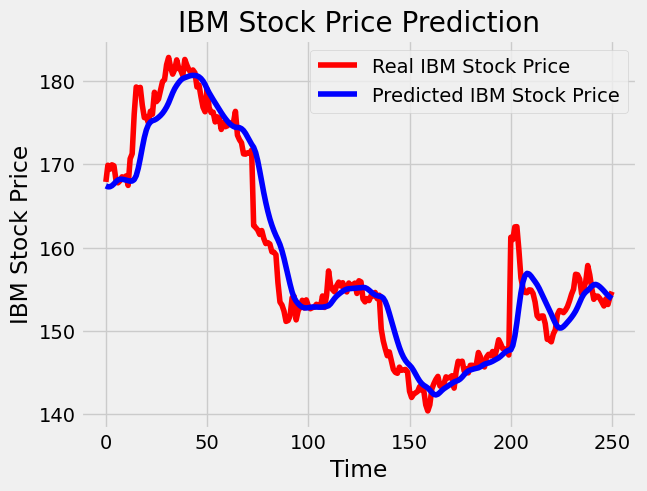

In [ ]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [ ]:
# Evaluating GRU
GRU=return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.240863443801435.


In [ ]:
# Calculate RMSE for LSTM and GRU models
lstm_rmse = np.sqrt(mean_squared_error(test_set,predicted_stock_price))
gru_rmse = np.sqrt(mean_squared_error(test_set,GRU_predicted_stock_price))

In [ ]:
# Compare the performance of LSTM and GRU models
print("LSTM RMSE: {:.3f}".format(lstm_rmse))
print("GRU RMSE: {:.3f}".format(gru_rmse))

LSTM RMSE: 3.258
GRU RMSE: 3.241


#INTERPRETATION:
Based on the provided RMSE values, the GRU model demonstrates slightly better prediction accuracy than the LSTM model for the given time series dataset, although the difference in performance is minor.

In [ ]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence,new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

1/1 [==============================] - 0s 30ms/step


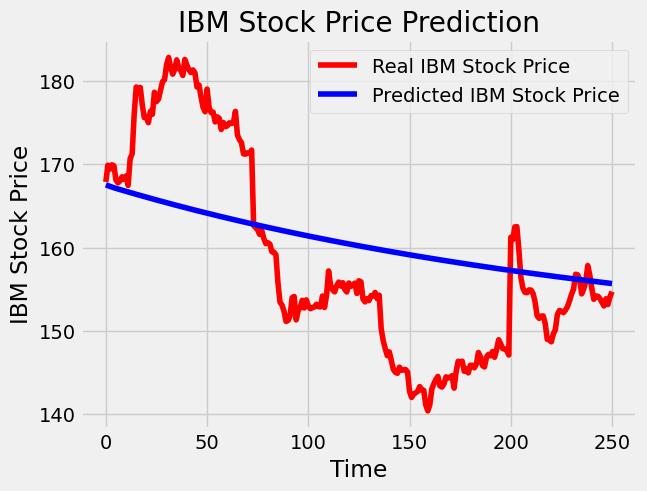

In [ ]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [ ]:
# Evaluating the sequence
return_rmse(test_set,sequence)

The root mean squared error is 9.958211642569788.


# 4.For the chosen dataset, implement autoencoder using (i) deep neural network (ii) CNN (iii) stacked encoder

# i) Deep Neural Network Autoencoder

In [ ]:
#Deep Neural Network Autoencoder:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [ ]:
# Define the autoencoder model
input_dim = 784  # 28*28
encoding_dim = 128
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [ ]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.2119
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1183
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0968
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0864
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0801
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0763
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0738
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0722
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0710
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0701


In [ ]:
# Perform reconstruction on test data
reconstructed_images_dnn = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


# ii)CNN Autoencoder

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalize and reshape the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [ ]:
# Define the autoencoder model
input_shape = (28, 28, 1)
input_img = Input(shape=input_shape)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
decoded = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
decoded = UpSampling2D((2, 2))(decoded)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)
autoencoder = Model(input_img, decoded)

In [ ]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
469/469 [==============================] - 64s 134ms/step - loss: 0.1239
Epoch 2/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0675
Epoch 3/10
469/469 [==============================] - 67s 142ms/step - loss: 0.0654
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: 0.0645
Epoch 5/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0640
Epoch 6/10
469/469 [==============================] - 68s 146ms/step - loss: 0.0636
Epoch 7/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0633
Epoch 8/10
469/469 [==============================] - 67s 143ms/step - loss: 0.0630
Epoch 9/10
469/469 [==============================] - 67s 144ms/step - loss: 0.0629
Epoch 10/10
469/469 [==============================] - 67s 144ms/step - loss: 0.0627


In [ ]:
# Perform reconstruction on test data
reconstructed_images_cnn = autoencoder.predict(x_test)

313/313 [==============================] - 5s 16ms/step


# iii) Stacked Encoder Autoencoder

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
# Normalize and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

In [ ]:
# Define the stacked encoder model
input_dim = 784  # 28*28
encoding_dims = [256, 128, 64]

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dims[0], activation='relu')(input_img)
encoded = Dense(encoding_dims[1], activation='relu')(encoded)
encoded = Dense(encoding_dims[2], activation='relu')(encoded)

decoded = Dense(encoding_dims[1], activation='relu')(encoded)
decoded = Dense(encoding_dims[0], activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [ ]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.2138
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1240
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1086
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.1008
Epoch 5/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0959
Epoch 6/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0928
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0905
Epoch 8/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0884
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0867
Epoch 10/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0854


In [ ]:
# Perform reconstruction on test data
reconstructed_images_stack = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


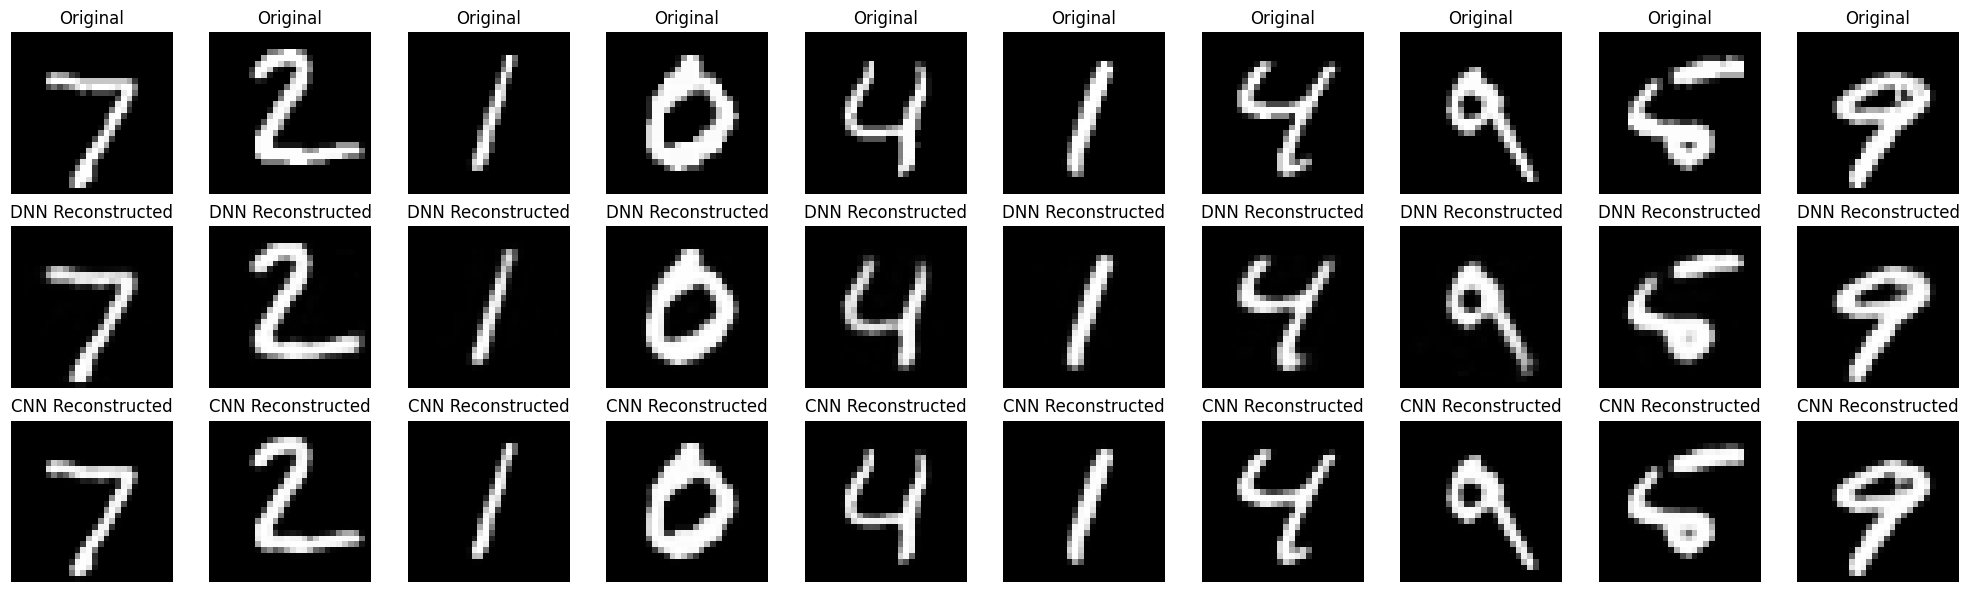

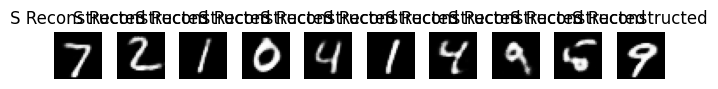

In [ ]:
import matplotlib.pyplot as plt

# Plot original images and their reconstructions for each autoencoder

n = 10  # Number of images to display

# Deep Neural Network Autoencoder
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(reconstructed_images_dnn[i].reshape(28, 28), cmap='gray')
    plt.title('DNN Reconstructed')
    plt.axis('off')

# CNN Autoencoder
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(reconstructed_images_cnn[i].reshape(28, 28), cmap='gray')
    plt.title('CNN Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

# stack Autoencoder
for i in range(n):
    # Display reconstructed images
    ax = plt.subplot(3, n, i + 2 * n + 1)
    plt.imshow(reconstructed_images_stack[i].reshape(28, 28), cmap='gray')
    plt.title('S Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()